# Regression Example: Used Car Price Prediction

This notebook introduces the steps to build a regression model to predict the resale price of an used car.

### Dataset

**Filename**: final_cars_maruti.csv

It is a comma separated file and there are 11 columns in the dataset.

1. Model - Model of the car
2. Location - The location in which the car was sold.
3. Age - Age of the car when the car was sold from the year of purchase.
4. KM_Driven - The total kilometers are driven in the car by the previous owner(s) in '000 kms.
5. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
6. Transmission - The type of transmission used by the car. (Automatic / Manual)
7. Owner_Type - First, Second, Third, or Fourth & Above
8. Mileage - The standard mileage offered by the car company in kmpl or km/kg
9. Power - The maximum power of the engine in bhp.
10. Seats - The number of seats in the car.
11. Price - The resale price of the car (target).


## 1. Loading the Dataset

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [288]:
cars_df = pd.read_csv('final_cars_maruti.csv')

In [289]:
cars_df.head(5)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
2,Jaipur,Diesel,Manual,First,5,5.99,3,swift,28.40,74.00,25
3,Hyderabad,Petrol,Manual,Second,5,2.75,7,alto,20.92,67.10,54
4,Jaipur,Petrol,Manual,Second,5,1.85,11,wagon,14.00,64.00,83


In [290]:
cars_df.shape

(1009, 11)

### Relationship between Age and Price

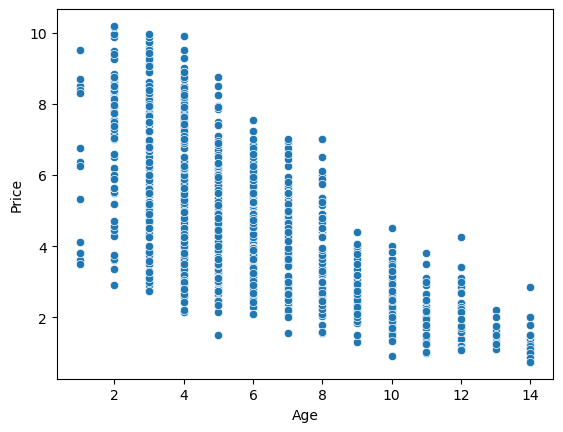

In [291]:
sn.scatterplot(data= cars_df,
               y = 'Price',
               x = 'Age');

## 2. Simple Linear Regression

Assumes linear relationship between features and outcome variable.

Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X$
									
- $\beta_{0}$ and $\beta_{1}$ are the regression coefficients
- $\hat{Y}$ is the predicted value of ${Y}$.


So, the error (Mean Squared Error) is:

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\hat{Y}))}^2$

or 

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))}^2$




Regression Explained: https://mlu-explain.github.io/linear-regression/

### Setting X and Y Variables

In [292]:
X = cars_df[['Age']]
y = cars_df.Price

### Splitting the dataset

In [293]:
from sklearn.model_selection import train_test_split

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [295]:
X_train.shape

(807, 1)

In [296]:
X_test.shape

(202, 1)

In [297]:
X_train[0:5]

,Age
159,13
664,9
683,9
447,8
25,4


In [298]:
X_test[0:5]

,Age
249,6
596,10
539,4
810,5
479,2


### Building the Model

In [299]:
from sklearn.linear_model import LinearRegression

In [300]:
lreg_v1 = LinearRegression()

In [301]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Finding the model parameters

In [302]:
lreg_v1.intercept_

7.623148875275806

In [303]:
lreg_v1.coef_

array([-0.49574448])

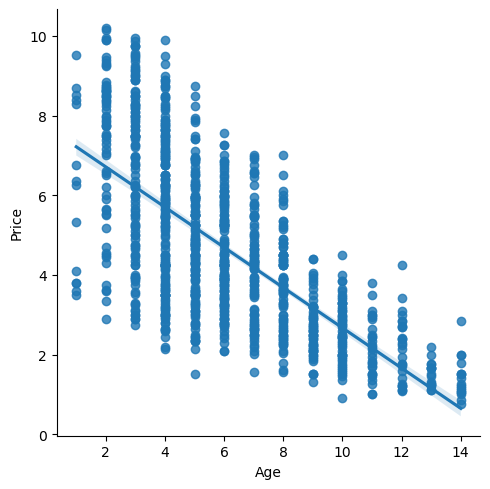

In [304]:
sn.lmplot(data = cars_df,
          y = 'Price',
          x = 'Age',
          fit_reg = True);

### Predicting on Test Set 

In [305]:
y_pred = lreg_v1.predict(X_test)

In [306]:
y_df = pd.DataFrame({ "actual" :y_test,
                      "predicted" : y_pred,
                      "residual" :y_test-y_pred})

In [307]:
y_df.sample(10)

,actual,predicted,residual
890,8.90,5.640171,3.259829
596,3.50,2.665704,0.834296
72,8.26,6.135915,2.124085
708,4.50,6.631660,-2.131660
114,7.75,6.135915,1.614085
523,5.75,4.648682,1.101318
197,4.65,5.640171,-0.990171
222,7.05,5.640171,1.409829
229,6.75,5.640171,1.109829
306,5.22,5.640171,-0.420171


### Error or Accuracy Analysis: RMSE

In [308]:
from sklearn.metrics import mean_squared_error

In [309]:
mse = mean_squared_error(y_df.actual, y_df.predicted)

In [310]:
mse

2.6451429781269318

In [311]:
rmse = np.sqrt(mse)

In [312]:
rmse

1.6263895530059616

### What is R-quared?

R-squared is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model.

https://www.investopedia.com/terms/r/r-squared.asp


Total Variance in Y = $\sum_{i=1}^{N}(Y_{i} - \bar{Y})^2$ 

where, 

- $\bar{Y}$ is the mean of Y.

Unexplained Variance = $\sum_{i=1}^{N}(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))^2$  


$R^{2}$ is given by:

$R^{2}$ = $\frac{explained\ Variance}{Total\ Variance}$


Notes:

- R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. 
- What is a “good” R-squared value depends on the domain or context. In the field of social sciences, even a relatively low R-squared, such as 0.5, could be considered relatively strong. In other fields, the standards for a good R-squared reading can be much higher, such as 0.9 or above. In finance, an R-squared above 0.7 would generally be seen as showing a high level of correlation. [Source](https://www.investopedia.com/terms/r/r-squared.asp)

In [313]:
from sklearn.metrics import r2_score

In [314]:
r2_score(y_df.actual, y_df.predicted)

0.4727024035981997

### Participants Exercise: 1

Build a model by adding the following two parameters and measure accuracy in terms of RMSE and R2.

- Age
- KM_Driven

In [315]:
X = cars_df[['Age', 'KM_Driven']]
y = cars_df.Price

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [318]:
X_train.shape

(807, 2)

In [319]:
X_test.shape

(202, 2)

In [320]:
from sklearn.linear_model import LinearRegression

In [321]:
lreg_v2 = LinearRegression()

In [322]:
lreg_v2.fit(X_train, y_train)

LinearRegression()

In [323]:
lreg_v2.intercept_

7.477740197835621

In [324]:
lreg_v2.coef_

array([-0.52755574,  0.00645844])

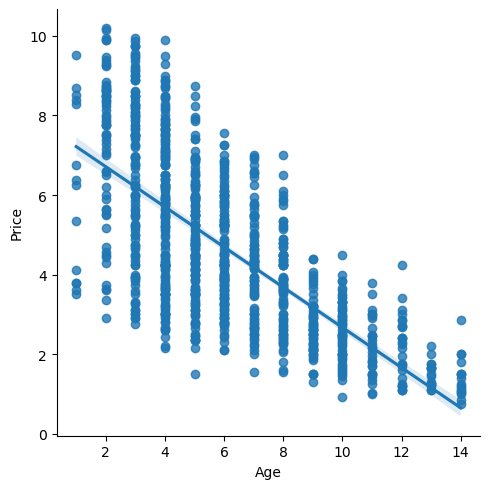

In [325]:
sn.lmplot(data = cars_df,
          y = 'Price',
          x = 'Age',
          fit_reg = True);

In [326]:
y_pred = lreg_v2.predict(X_test)

In [327]:
y_df = pd.DataFrame({ "actual" :y_test,
                      "predicted" : y_pred,
                      "residual" :y_test-y_pred})

In [328]:
y_df.sample(10)

,actual,predicted,residual
634,4.25,5.612938,-1.362938
558,6.91,5.214551,1.695449
345,2.10,3.214122,-1.114122
848,4.25,4.583660,-0.333660
46,2.05,3.715844,-1.665844
853,4.80,3.631884,1.168116
687,2.00,2.654274,-0.654274
205,7.75,5.716273,2.033727
742,2.00,2.858907,-0.858907
568,5.25,4.796789,0.453211


In [329]:
from sklearn.metrics import mean_squared_error

In [330]:
mse = mean_squared_error(y_df.actual, y_df.predicted)

In [331]:
mse

2.6099666716513075

In [332]:
rmse = np.sqrt(mse)

In [333]:
rmse

1.6155391272424533

In [334]:
from sklearn.metrics import r2_score

In [335]:
r2_score(y_df.actual, y_df.predicted)

0.47971464528353347

## 3. Building a model with more variables

Based on most important questions that customers ask

- Which model is it? (categorical feature)
- How old the vehicle is?
- How many kilometers it is driven?
    

### Feature Set Selection

In [336]:
x_features = ['Model', 'Age', 'KM_Driven']

### How to encode categorical variables?

OHE: One Hot Encoding

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [337]:
encoded_cars_df = pd.get_dummies(cars_df[x_features],
                                 columns = ['Model'])

In [338]:
encoded_cars_df.head(5)

,Age,KM_Driven,Model_a-star,Model_alto,Model_baleno,Model_celerio,Model_ciaz,Model_dzire,Model_eeco,Model_ertiga,Model_omni,Model_ritz,Model_swift,Model_vitara,Model_wagon,Model_zen
0,8,87,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5,64,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,7,54,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,11,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [339]:
encoded_cars_df.shape

(1009, 16)

In [340]:
len(cars_df.Model.unique())

14

### Setting X and y variables

In [341]:
X = encoded_cars_df

In [342]:
y = cars_df.Price

### Data Splitting

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size =0.8,
                                                    random_state = 40)

In [344]:
X.shape

(1009, 16)

In [345]:
X_train.shape

(807, 16)

In [346]:
X_train[0:10]

,Age,KM_Driven,Model_a-star,Model_alto,Model_baleno,Model_celerio,Model_ciaz,Model_dzire,Model_eeco,Model_ertiga,Model_omni,Model_ritz,Model_swift,Model_vitara,Model_wagon,Model_zen
158,8,96,0,0,0,0,0,0,0,0,0,1,0,0,0,0
198,9,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0
331,5,51,0,0,0,0,0,0,0,0,0,0,1,0,0,0
556,7,43,0,0,0,0,0,0,0,0,0,0,1,0,0,0
204,7,56,0,1,0,0,0,0,0,0,0,0,0,0,0,0
744,4,54,0,0,0,0,1,0,0,0,0,0,0,0,0,0
726,6,98,0,0,0,0,0,0,0,0,0,0,1,0,0,0
570,4,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0
98,6,49,0,0,0,0,1,0,0,0,0,0,0,0,0,0
679,6,61,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 4. Multiple Linear Regression Model


Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{n}X_{n}$
									
- $\beta_{0}$, $\beta_{1}$...$\beta_{n}$  are the regression coefficients

In [347]:
lreg_v2 = LinearRegression()
lreg_v2.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [348]:
lreg_v2.intercept_

6.797674428948875

In [349]:
lreg_v2.coef_

array([-0.32510246, -0.00458647, -1.02336178, -1.86138553,  1.35119448,
       -0.98470574,  2.17690626,  1.24631711, -1.36101243,  2.18856792,
       -2.32440576, -0.43699509,  0.25826952,  3.0745239 , -1.15622224,
       -1.14769062])

In [350]:
dict(zip(X_train.columns,
         np.round(lreg_v2.coef_, 3)))

{'Age': -0.325,
 'KM_Driven': -0.005,
 'Model_a-star': -1.023,
 'Model_alto': -1.861,
 'Model_baleno': 1.351,
 'Model_celerio': -0.985,
 'Model_ciaz': 2.177,
 'Model_dzire': 1.246,
 'Model_eeco': -1.361,
 'Model_ertiga': 2.189,
 'Model_omni': -2.324,
 'Model_ritz': -0.437,
 'Model_swift': 0.258,
 'Model_vitara': 3.075,
 'Model_wagon': -1.156,
 'Model_zen': -1.148}

### Predict on test set

In [351]:
y_pred_2 = lreg_v2.predict(X_test)

In [352]:
y_df_2 = pd.DataFrame({"actual": y_test,
                       "predicted": y_pred_2,
                       "residual": y_test - y_pred_2})

In [353]:
y_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 991 to 132
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   actual     202 non-null    float64
 1   predicted  202 non-null    float64
 2   residual   202 non-null    float64
dtypes: float64(3)
memory usage: 6.3 KB


In [354]:
y_df_2.sample(10)

,actual,predicted,residual
727,1.50,1.382557,0.117443
64,3.91,3.021975,0.888025
957,2.20,3.558356,-1.358356
768,3.95,4.588175,-0.638175
683,2.50,2.746786,-0.246786
608,8.90,6.981541,1.918459
287,3.60,3.058441,0.541559
828,8.85,7.484905,1.365095
677,1.30,3.808969,-2.508969
283,3.22,1.790216,1.429784


### Measuring Accuracy

In [355]:
r2_score(y_df_2.actual, y_df_2.predicted)

0.8553137746014273

In [356]:
mse_2 = mean_squared_error(y_df_2.actual, y_df_2.predicted)

In [357]:
rmse_2 = np.sqrt(mse_2)
rmse_2

0.8168926876769056

### Participants Exercise: 2

Build a model by adding the following five parameters and measure accuracy in terms of RMSE and R2.

- Age
- KM_Driven
- Model
- Transmission Type
- Fuel Type

In [358]:
x_features = ['Model', 'Age', 'KM_Driven', 'Transmission', 'Fuel_Type']

In [359]:
encoded_cars_df = pd.get_dummies(cars_df[x_features],
                                 columns = ['Model', 'Transmission', 'Fuel_Type'])

In [360]:
encoded_cars_df.head(5)

,Age,KM_Driven,Model_a-star,Model_alto,Model_baleno,Model_celerio,Model_ciaz,Model_dzire,Model_eeco,Model_ertiga,Model_omni,Model_ritz,Model_swift,Model_vitara,Model_wagon,Model_zen,Transmission_Automatic,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,8,87,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
1,5,64,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,3,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
3,7,54,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,11,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [361]:
encoded_cars_df.shape

(1009, 20)

In [362]:
X = encoded_cars_df
y = cars_df.Price

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size =0.8,
                                                    random_state = 40)

In [364]:
X.shape

(1009, 20)

In [365]:
X_train.shape

(807, 20)

In [366]:
X_train[0:10]

,Age,KM_Driven,Model_a-star,Model_alto,Model_baleno,Model_celerio,Model_ciaz,Model_dzire,Model_eeco,Model_ertiga,Model_omni,Model_ritz,Model_swift,Model_vitara,Model_wagon,Model_zen,Transmission_Automatic,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
158,8,96,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
198,9,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
331,5,51,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
556,7,43,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
204,7,56,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
744,4,54,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
726,6,98,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
570,4,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
98,6,49,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
679,6,61,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [367]:
lreg_v2 = LinearRegression()
lreg_v2.fit(X_train, y_train)

LinearRegression()

In [368]:
lreg_v2.intercept_

7.06626841790438

In [369]:
lreg_v2.coef_

array([-0.29576458, -0.00679634, -0.94900228, -1.67585502,  1.36381227,
       -1.10138912,  2.11161179,  0.89167961, -1.09367115,  2.07300342,
       -2.07816379, -0.52949666,  0.19422949,  2.86854785, -1.03188196,
       -1.04342444,  0.32901282, -0.32901282,  0.2584277 , -0.2584277 ])

In [370]:
dict(zip(X_train.columns,
         np.round(lreg_v2.coef_, 3)))

{'Age': -0.296,
 'KM_Driven': -0.007,
 'Model_a-star': -0.949,
 'Model_alto': -1.676,
 'Model_baleno': 1.364,
 'Model_celerio': -1.101,
 'Model_ciaz': 2.112,
 'Model_dzire': 0.892,
 'Model_eeco': -1.094,
 'Model_ertiga': 2.073,
 'Model_omni': -2.078,
 'Model_ritz': -0.529,
 'Model_swift': 0.194,
 'Model_vitara': 2.869,
 'Model_wagon': -1.032,
 'Model_zen': -1.043,
 'Transmission_Automatic': 0.329,
 'Transmission_Manual': -0.329,
 'Fuel_Type_Diesel': 0.258,
 'Fuel_Type_Petrol': -0.258}

In [371]:
y_pred_2 = lreg_v2.predict(X_test)

In [372]:
y_df_2 = pd.DataFrame({"actual": y_test,
                       "predicted": y_pred_2,
                       "residual": y_test - y_pred_2})

In [373]:
y_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 991 to 132
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   actual     202 non-null    float64
 1   predicted  202 non-null    float64
 2   residual   202 non-null    float64
dtypes: float64(3)
memory usage: 6.3 KB


In [374]:
y_df_2.sample(10)

,actual,predicted,residual
14,4.45,3.842515,0.607485
335,3.40,3.324201,0.075799
652,5.31,4.973563,0.336437
277,6.84,6.798985,0.041015
339,5.99,5.116286,0.873714
50,6.15,5.194568,0.955432
991,9.95,8.259227,1.690773
614,1.75,0.604624,1.145376
962,3.65,3.872517,-0.222517
971,6.80,6.663104,0.136896


In [375]:
r2_score(y_df_2.actual, y_df_2.predicted)

0.867394164494689

In [376]:
mse_2 = mean_squared_error(y_df_2.actual, y_df_2.predicted)
rmse_2 = np.sqrt(mse_2)
rmse_2

0.7820467818621499

## 4. Building model with all the variables

### Feature Set Selection

In [377]:
x_features = list(cars_df.columns)
x_features

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Price',
 'Age',
 'Model',
 'Mileage',
 'Power',
 'KM_Driven']

In [378]:
x_features.remove('Price')
x_features

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Age',
 'Model',
 'Mileage',
 'Power',
 'KM_Driven']

### Encoding Categorical Variables


In [379]:
cat_features =['Location',
               'Fuel_Type',
               'Transmission',
               'Owner_Type',
               'Model']

In [380]:
num_features = list(set(x_features) - set(cat_features))
num_features

['Power', 'Age', 'KM_Driven', 'Mileage', 'Seats']

In [381]:
encoded_cars_df = pd.get_dummies(cars_df[x_features],
                                 columns = cat_features,
                                 drop_first = True)

In [382]:
encoded_cars_df.head(5)

,Seats,Age,Mileage,Power,KM_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Model_ciaz,Model_dzire,Model_eeco,Model_ertiga,Model_omni,Model_ritz,Model_swift,Model_vitara,Model_wagon,Model_zen
0,7,8,20.77,88.76,87,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5,5,25.20,74.00,64,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5,3,28.40,74.00,25,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,7,20.92,67.10,54,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,11,14.00,64.00,83,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [383]:
encoded_cars_df.columns

Index(['Seats', 'Age', 'Mileage', 'Power', 'KM_Driven', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second',
       'Owner_Type_Third', 'Model_alto', 'Model_baleno', 'Model_celerio',
       'Model_ciaz', 'Model_dzire', 'Model_eeco', 'Model_ertiga', 'Model_omni',
       'Model_ritz', 'Model_swift', 'Model_vitara', 'Model_wagon',
       'Model_zen'],
      dtype='object')

### Setting X and y variables

In [384]:
X = encoded_cars_df
y = cars_df.Price

### Data Splitting

In [385]:
X_train, X_test, y_train, y_test =  train_test_split(X,
                                                     y, 
                                                     test_size =0.2,
                                                     random_state = 40)

In [386]:
X_train.shape

(807, 32)

In [387]:
X_test.shape

(202, 32)

### Build Model

In [388]:
lreg_v3 = LinearRegression()
lreg_v3.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [389]:
lreg_v3.intercept_

5.031291914787841

In [390]:
lreg_v3.coef_

array([ 5.38234462e-02, -2.50294997e-01,  3.60918458e-02,  8.46451988e-04,
       -1.03514001e-02,  7.08545660e-01,  1.96501120e-01,  1.08128699e+00,
       -2.62219372e-01,  8.04456940e-01,  1.63547742e-01,  4.16014051e-01,
       -7.81759322e-01, -1.59689630e-01,  3.92632263e-02, -4.12521109e-01,
       -5.20882929e-01, -1.21418659e-01, -3.01115691e-01, -7.32178020e-01,
        2.40367887e+00, -5.70749305e-02,  3.14013261e+00,  1.76025237e+00,
       -3.61521538e-01,  3.22278706e+00, -1.20353520e+00,  3.30107692e-01,
        1.33176801e+00,  3.84225521e+00,  1.98573448e-01, -7.37685691e-02])

In [391]:
dict(zip(X_train.columns,
         np.round(lreg_v3.coef_, 3)))

{'Seats': 0.054,
 'Age': -0.25,
 'Mileage': 0.036,
 'Power': 0.001,
 'KM_Driven': -0.01,
 'Location_Bangalore': 0.709,
 'Location_Chennai': 0.197,
 'Location_Coimbatore': 1.081,
 'Location_Delhi': -0.262,
 'Location_Hyderabad': 0.804,
 'Location_Jaipur': 0.164,
 'Location_Kochi': 0.416,
 'Location_Kolkata': -0.782,
 'Location_Mumbai': -0.16,
 'Location_Pune': 0.039,
 'Fuel_Type_Petrol': -0.413,
 'Transmission_Manual': -0.521,
 'Owner_Type_Second': -0.121,
 'Owner_Type_Third': -0.301,
 'Model_alto': -0.732,
 'Model_baleno': 2.404,
 'Model_celerio': -0.057,
 'Model_ciaz': 3.14,
 'Model_dzire': 1.76,
 'Model_eeco': -0.362,
 'Model_ertiga': 3.223,
 'Model_omni': -1.204,
 'Model_ritz': 0.33,
 'Model_swift': 1.332,
 'Model_vitara': 3.842,
 'Model_wagon': 0.199,
 'Model_zen': -0.074}

### Predict on test set

In [392]:
y_pred_3 = lreg_v3.predict(X_test)

In [393]:
y_df_3 = pd.DataFrame({"actual": y_test,
                      "predicted": y_pred_3,
                      "residual": y_test - y_pred_3})
y_df_3.sample(10)

,actual,predicted,residual
600,2.01,1.784075,0.225925
92,6.20,6.460597,-0.260597
209,4.50,4.366137,0.133863
723,4.35,4.944133,-0.594133
31,2.65,2.569322,0.080678
217,5.25,5.642856,-0.392856
341,3.75,3.490155,0.259845
666,7.85,7.660145,0.189855
680,2.70,3.111878,-0.411878
446,6.95,5.201355,1.748645


### Measuring Accuracy: RMSE and R2

In [394]:
r2_score(y_df_3.actual, y_df_3.predicted)

0.9192388548172428

In [395]:
mse_3 = mean_squared_error(y_df_3.actual, y_df_3.predicted)
rmse_3 = np.sqrt(mse_3)
rmse_3

0.6103130402412239

### What are the reasons for the remaining error?

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Noise (randomness)
   

### Error Analysis: Deep Dive

<AxesSubplot:xlabel='residual', ylabel='Count'>

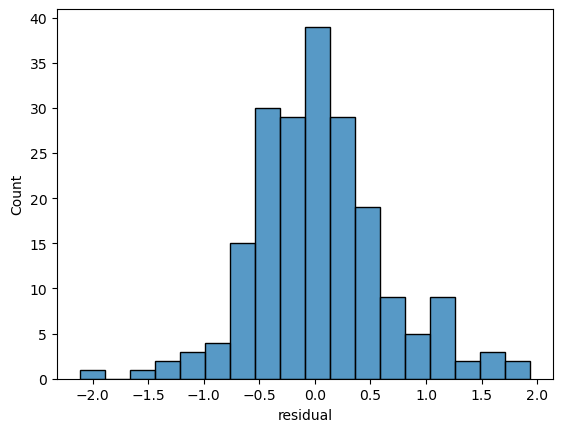

In [396]:
sn.histplot(y_df_3.residual)

<AxesSubplot:xlabel='residual', ylabel='Density'>

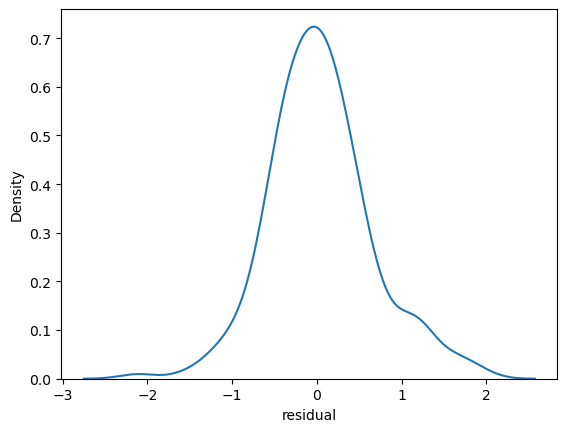

In [397]:
sn.kdeplot(y_df_3.residual)

In [398]:
y_df_3.residual.mean()

0.040122722415662386

## Plotting predicted values vs actual values

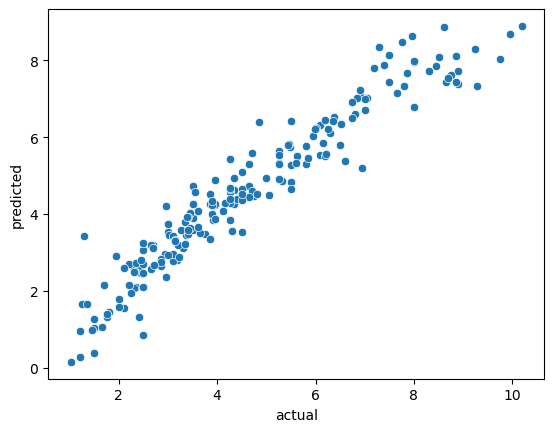

In [399]:
sn.scatterplot(data=y_df_3, 
               x='actual',
               y= 'predicted');

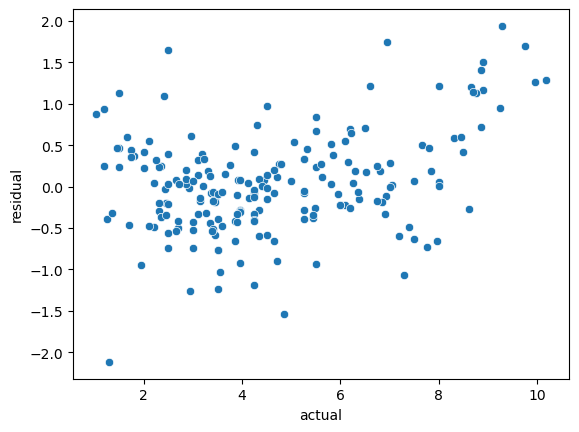

In [400]:
sn.scatterplot(data=y_df_3, 
               x='actual',
               y= 'residual');

In [401]:
X_test.index

Int64Index([991, 844, 608, 669, 457,  79, 366, 498, 414, 935,
            ...
            875, 564, 589, 243, 272, 994, 550, 530, 843, 132],
           dtype='int64', length=202)

In [402]:
x_test_df = cars_df[cars_df.index.isin(X_test.index)]
x_test_df.shape

(202, 11)

In [403]:
x_test_df.head(10)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
9,Delhi,Diesel,Manual,First,5,3.85,7,swift,28.40,74.00,65
14,Bangalore,Petrol,Manual,First,5,4.45,4,wagon,18.90,67.10,62
15,Coimbatore,Petrol,Manual,First,5,2.41,10,omni,14.00,35.00,93
18,Pune,Petrol,Manual,First,5,2.45,9,wagon,18.90,67.10,43
20,Coimbatore,Petrol,Manual,First,5,5.81,4,ritz,21.10,85.80,30
26,Ahmedabad,Petrol,Manual,First,5,6.20,3,swift,20.40,81.80,24
31,Kolkata,Petrol,Manual,First,5,2.65,7,wagon,22.50,67.04,32
34,Chennai,Diesel,Manual,First,5,8.45,4,ciaz,28.09,88.50,34


In [404]:
y_df_3.head(10)

,actual,predicted,residual
991,9.95,8.693509,1.256491
844,4.35,4.627311,-0.277311
608,8.90,7.397035,1.502965
669,3.00,3.525978,-0.525978
457,3.36,3.442479,-0.082479
79,6.37,6.520725,-0.150725
366,2.50,3.054840,-0.554840
498,6.51,6.333572,0.176428
414,3.19,2.791404,0.398596
935,2.70,3.198269,-0.498269


In [405]:
y_df_3 = y_df_3.sort_index()
y_df_3.head(10)

,actual,predicted,residual
0,6.00,6.228288,-0.228288
1,5.60,5.333029,0.266971
9,3.85,4.511815,-0.661815
14,4.45,4.370090,0.079910
15,2.41,1.314038,1.095962
18,2.45,2.646009,-0.196009
20,5.81,5.300841,0.509159
26,6.20,5.504968,0.695032
31,2.65,2.569322,0.080678
34,8.45,7.851763,0.598237


In [406]:
x_test_df = x_test_df.join(y_df_3)

In [407]:
x_test_df.head(10)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven,actual,predicted,residual
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87,6.00,6.228288,-0.228288
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64,5.60,5.333029,0.266971
9,Delhi,Diesel,Manual,First,5,3.85,7,swift,28.40,74.00,65,3.85,4.511815,-0.661815
14,Bangalore,Petrol,Manual,First,5,4.45,4,wagon,18.90,67.10,62,4.45,4.370090,0.079910
15,Coimbatore,Petrol,Manual,First,5,2.41,10,omni,14.00,35.00,93,2.41,1.314038,1.095962
18,Pune,Petrol,Manual,First,5,2.45,9,wagon,18.90,67.10,43,2.45,2.646009,-0.196009
20,Coimbatore,Petrol,Manual,First,5,5.81,4,ritz,21.10,85.80,30,5.81,5.300841,0.509159
26,Ahmedabad,Petrol,Manual,First,5,6.20,3,swift,20.40,81.80,24,6.20,5.504968,0.695032
31,Kolkata,Petrol,Manual,First,5,2.65,7,wagon,22.50,67.04,32,2.65,2.569322,0.080678
34,Chennai,Diesel,Manual,First,5,8.45,4,ciaz,28.09,88.50,34,8.45,7.851763,0.598237


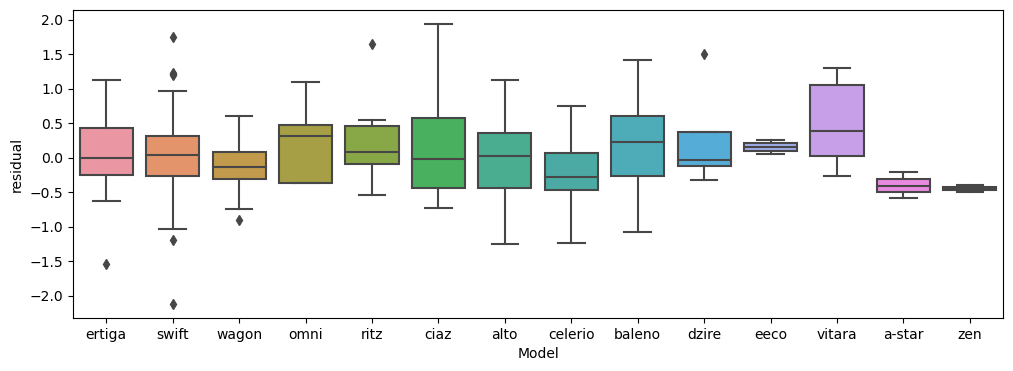

In [409]:
plt.figure(figsize = (12,4))
sn.boxplot(data = x_test_df,
           x ='Model',
           y= 'residual');

In [410]:
x_test_df[x_test_df.Model == 'ritz'].sort_values('residual', ascending = False)[0:2]

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven,actual,predicted,residual
683,Kolkata,Petrol,Manual,First,5,2.50,9,ritz,18.5,85.8,150,2.50,0.850313,1.649687
369,Coimbatore,Diesel,Manual,First,5,5.05,7,ritz,21.1,73.9,73,5.05,4.507294,0.542706


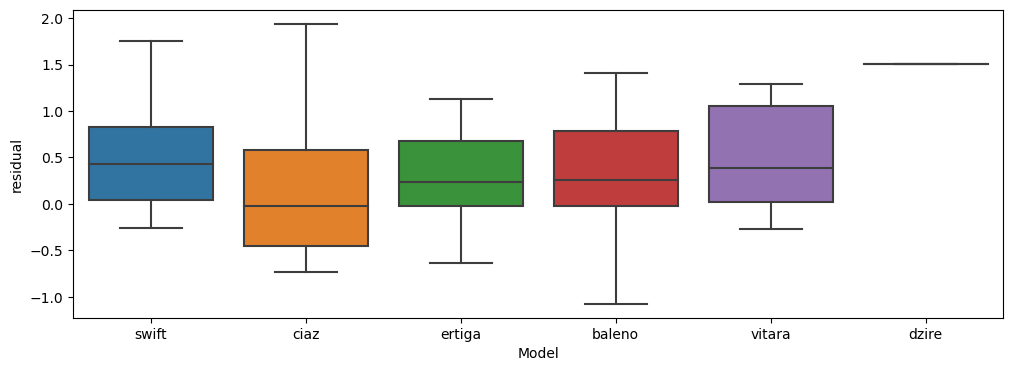

In [412]:
plt.figure(figsize = (12,4))
sn.boxplot(data = x_test_df[x_test_df.Price>6],
           x ='Model',
           y= 'residual');

In [414]:
cars_df[cars_df.Model == 'dzire'].shape

(24, 11)

### Participant Exercise: 3

Take different training set, build model and measure the model accuracy. But, how to sample differenent training and test sets?
- Change the random_state to different numbers while training and test splits and then measure the r2 values.
- Repeat the above process for 5 different random_states and make a note of the r2 values.

## 6. Storing the model

In [416]:
class CarPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [418]:
my_model = CarPredictionModel(lreg_v3, list(X_train.columns), rmse_3)

In [419]:
my_model.model

LinearRegression()

In [420]:

my_model.rmse

0.6103130402412239

In [421]:
from joblib import dump

In [422]:
dump(my_model, 'cars.pkl')

['cars.pkl']

In [424]:
ls -al

 Volume in drive C is OS
 Volume Serial Number is 7EFF-AF26

 Directory of C:\Users\Sohan\OneDrive - Indian Institute of Management\ML Manaranjan Pradhan\Session_7



File Not Found
